# Programming Assignment 12B: [Axis of Awesome](https://youtu.be/5pidokakU4I?si=Y5ewcgPFFQ5cLmC6)

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 2.4. Due: complete this PA prior to class on Friday, Dec 8, 2023.*

## Overview of Assignment

This assignment quickly introduces you to making computations across rows and columns of 2-dimensional Numpy arrays (matrices) using the `axis` keyword argument. It also illustrates the use of a specific figure from the `statsmodels` package that will be useful during the time series analysis week.

**Remember:** PA12 has two notebooks that must be completed (A and B). Follow the instructions in **`README.md`** if you have not already done so.

## Assignment Criteria

**You will pass this assignment as long as your repository fulfills the following criteria:**  

- You have completed this notebook and it runs without errors
- Don't forget the criteria in the other notebook of PA12

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Introduction

Often when we have a long sequence of data we would like to evaluate specific sub-sets of it. For example, if we have 10 years worth of hourly measurements, but would like to evaluate the monthly or weekly characteristics. Often we can store our data in a structured way and then use some indexing capabilities of Numpy to evaluate it in a smart way. Check out the following simple tips, then try and apply it in practice.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1:</b>   
    
Read and run the cells below, making sure you understand what is happening (i.e., completing evaluations on the rows and columns of the matrix).
</p>
</div>

First, let's start by collecting a "long" sequence of data.

In [2]:
A = np.array([1, 20, 300, 1, 2, 3])
print(A)

[  1  20 300   1   2   3]


It is easy to restructure it into a matrix form; in this case, 2 rows and 3 columns.

In [3]:
B = np.reshape(A, (2, 3))
print(B)

[[  1  20 300]
 [  1   2   3]]


In Numpy, "axes" are used to specify the structure of an array using the `axis` keyword argument. For this assignment, we are particularly interested in performing operations along the 0th and 1st axes of the array, which correspond to the columns and rows, respectively. Check it out:

In [4]:
B.mean(axis=0)

array([  1. ,  11. , 151.5])

Looking along the other axis:

In [5]:
B.mean(axis=1)

array([107.,   2.])

And you can do it for other methods too!

In [6]:
B.std(axis=1)

array([136.6918676 ,   0.81649658])

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2:</b>   
    
Read the simple story below and use the tips described above to complete the partially completed code cell.
</p>
</div>

Suppose you and a group of friends would like to evaluate your financial decisions, and you decide to review how many coins you spend at PSOR, the CEG student pub, to practice your Python skills. You have assembled data on the number of coins purchased per month, for several years, starting from when you first met in September, through August, 3 years later.

In [10]:
coins = np.array([46, 28, 16, 27,
         22, 24, 31, 12,
         32, 36, 12, 0,
         41, 27, 21, 26,
         21, 19, 18, 35,
         14, 34, 8, 0,
         53, 34, 23, 35,
         28, 26, 18, 13,
         12, 14, 34, 0])
coins_matrix = np.reshape(coins,(3,12))
         
print(len(coins))
print(coins_matrix)


36
[[46 28 16 27 22 24 31 12 32 36 12  0]
 [41 27 21 26 21 19 18 35 14 34  8  0]
 [53 34 23 35 28 26 18 13 12 14 34  0]]


In [8]:
np.set_printoptions(precision=1)
print(f'The average number of coins spent per month is: {np.mean(coins_matrix.mean(axis=0))}')
print(f'The average number of coins spent per month for each year is: {coins_matrix.mean(axis=1)}')
print(f'The average number of coins spent each september: {coins_matrix.mean(axis=0)[0]}')
print(f'The average number of coins spent each january: {coins_matrix.mean(axis=0)[4]}')
print(f'Max coins spent in any month:{np.max(coins_matrix.max(axis=0))}')
print(f'Max coins spent in any year: {np.max(coins_matrix.sum(axis=1))}')

The average number of coins spent per month is: 23.333333333333332
The average number of coins spent per month for each year is: [23.8 22.  24.2]
The average number of coins spent each september: 46.666666666666664
The average number of coins spent each january: 23.666666666666668
Max coins spent in any month:53
Max coins spent in any year: 290


The answers are:
```
The average number of coins spent per month is: 23.3
The average number of coins spent per month for each year is: [23.8 22.  24.2]
The average number of coins spent in september: 46.7
The average number of coins spent in january: 23.7
Max coins spent in any month: 53.0
Max coins spent in any year: 290.0
```

## Correlated Behavior?

Now that we have three years of data, we want to see if there is a trend in our behavior. We can take the correlation concepts we learned in Q1 and see if there is a relationship from one month to the next. In other words: if we spend a lot of coins one month, is the _probability_ that we spend a lot of coins the next month _higher_? Evaluating correlation this way has many names: autocorrelation, autocovariance, etc...the "auto" in this case refers to evaluating the relationship between data from the same sequence (you will learn about it more in the time series reading). Luckily, there is a built-in method of `statsmodels` that does this for us automatically: the correlation is plotted on the y-axis between the distance away from any point in the series. It is important to recognize that the correlations represent any point in the series (analogous to an average), rather than any specific point)

_Note the use of reshape to put the data back into a 1D array (row/column)!_

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3:</b>   
    
Run the cells to visualize the plots, then read the interpretations.
</p>
</div>

[46 28 16 27 22 24 31 12 32 36 12  0 41 27 21 26 21 19 18 35 14 34  8  0
 53 34 23 35 28 26 18 13 12 14 34  0]


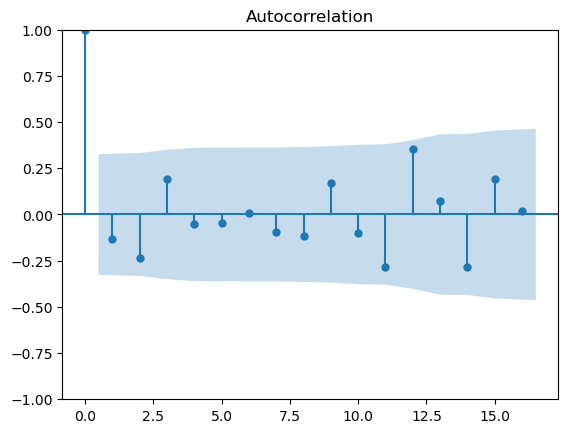

In [32]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(coins.reshape(-1));
print(coins)

**Interpretation:** it appears that there is little correlation from one month to the next in the data set, except each point is very strongly correlated with itself (that should be obvious!). Even more importantly, the points are inside the shaded blue region: that is the confidence interval, which means the values are negligible.

Now let's try an increasing series and see what happens:

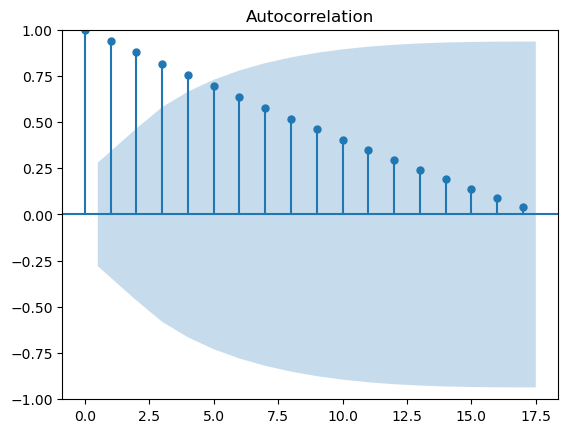

In [40]:
increasing_series = np.arange(1, 50)
plot_acf(increasing_series);

**Interpretation:**  now there is definitely correlation! And we see that the correlation drops off with distance (which makes sense for a linear trend). However, the confidence interval is large, so the trend in correlation should not be trusted for a large distance (you can check and set the confidence interval easily, check the [documentation](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html)).

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p>Note that we don't give a full explanation of the x-axis in these plots, and the terminology for correlation is vague; see the reading for a thorough explanation.</p></div>

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4:</b>   
    
Test your knowledge of correlation! See if you can create a sequence of data that somehow creates alternating positive and negative values of autocorrelation, as illustrated in the figure. You don't need to exactly recreate the plot, as long as there's alternating values autocorrelation.
</p>
</div>

![Image of alternating autocorrelation plot](alternation.svg)

25


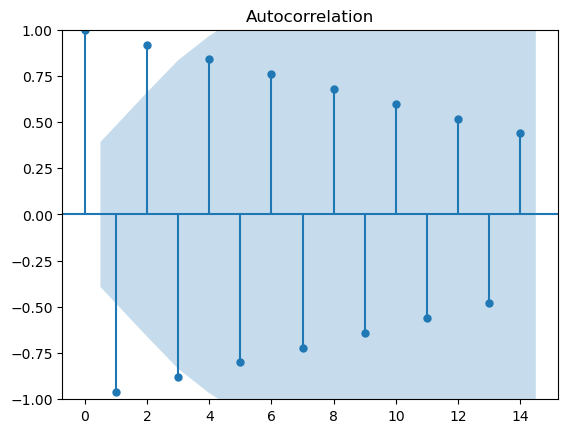

In [43]:
strong_autocorr_positive = np.array([0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0])
print(len(strong_autocorr_positive))
plot_acf(strong_autocorr_positive);

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png"/>
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png"/>
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2023 <a rel="MUDE Team" href="https://studiegids.tudelft.nl/a101_displayCourse.do?course_id=65595">MUDE Teaching Team</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.